In [1]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from classy_sz import Class
from scipy.interpolate import interp1d

#matplotlib.use('pdf')
font = {'size'   : 16, 'family':'STIXGeneral'}
plt.rcParams.update({
     "text.usetex": True,
     "font.family": "serif",
     "font.sans-serif": ['Computer Modern']})
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})


# import sys 
# sys.path.append('/Users/aleksandra/Desktop/Research_old/unWISE_dictonaries/')
# from maglim_HOD_joint import *


path_to_class_sz = "/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/"
path_data = "/Users/boris/Downloads/data_for_SOLikeT/"

2024-03-27 14:35:46.525181: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-03-27 14:35:46.525219: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-03-27 14:35:46.525231: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-03-27 14:35:46.525334: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-27 14:35:46.525636: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


-- change cov 

# Data

In [2]:
Maglim_bin = 2
act_map = "ilc_SZ_deproj_cib_dBeta_1.77_10.14_yy"
cls = "dl"

Npoints =25
ELLMAX=5600

alpha_lmag_list = [1.21, 1.15, 1.88, 1.97]
pw_file = path_data+"const/pixel_window_bin_nside4096.txt"
bpwf_file = path_data+"const/bpwf_namaster_yg_MaglimxACT_ellmax5601_ellmin30_dl.npy"

In [3]:

# cov_yg = np.loadtxt(path_yg + "yg_cov_ACT_DR6_healpy_4096_"+act_map+"_DES_Maglim_"+str(Maglim_bin)+"_"+cls+".txt")
cov_kg_yg = np.loadtxt(path_data + "cov/combined_cov_gk_gy_Maglim"+str(Maglim_bin)+"_kappa4_"+act_map+"_"+cls+".txt")

cov_yg = cov_kg_yg[9:,9:] 

bin_wind0 = np.load(bpwf_file)[0]
bin_wind= bin_wind0[:,0, :]
pix_win = np.loadtxt(pw_file)

ell_data = np.array([ 130.,  330.,  530.,  730.,  930., 1130., 1330., 1530., 1730.,
       1930., 2130., 2330., 2530., 2730., 2930., 3130., 3330., 3530.,
       3730., 3930., 4130., 4330., 4530., 4730., 4930., 5130., 5330.,
       5530.])


## class_sz dicts

In [46]:
maglim_pdict={}
maglim_pdict['galaxy_sample']= 'custom'
maglim_pdict['hm_consistency']= 1
maglim_pdict['delta for galaxies'] = "200c"
maglim_pdict['delta for matter density'] = "200c"
maglim_pdict['mass function'] = 'T08M200c'
maglim_pdict['concentration parameter'] = 'D08'

maglim_pdict['full_path_to_source_dndz_gal'] = path_to_class_sz+'class_sz_auxiliary_files/nz_source_normalized_bin4.txt' # source galaxies
maglim_pdict['x_out_truncated_nfw_profile']= 1.0

# maglim_pdict['dlogell']= 0.1
maglim_pdict['dell']= 200
maglim_pdict['multipoles_sz']= 'ell_mock'
maglim_pdict['ell_max']= 5500.0
maglim_pdict['ell_min']= 500.0


maglim_pdict['z_min']= 1.0e-8
maglim_pdict['z_max']= 2.0
maglim_pdict['M_min']= 1.0e10
maglim_pdict['M_max']= 3.5e15

### Precision
maglim_pdict['redshift_epsabs']= 1.0e-40
maglim_pdict['redshift_epsrel']= 1e-3
maglim_pdict['mass_epsabs']= 1.0e-40
maglim_pdict['mass_epsrel']= 1e-3
maglim_pdict['ndim_masses']= 80
maglim_pdict['ndim_redshifts']= 80
maglim_pdict['class_sz_verbose']= 0
maglim_pdict['nonlinear_verbose']= 0

# maglim_pdict['P_k_max_h/Mpc']=100.0
# maglim_pdict['k_min_for_pk_class_sz']= 0.0001
# maglim_pdict['k_max_for_pk_class_sz']= 70.0
# maglim_pdict['k_per_decade_class_sz']= 20.0

# maglim_pdict['use_fft_for_profiles_transform']= 1
# maglim_pdict['N_samp_fftw'] = 8192 #precision parameter for the bessel transform to theta space
# maglim_pdict['l_min_samp_fftw'] = 1e-12
# maglim_pdict['l_max_samp_fftw']= 1e12
# maglim_pdict['x_min_gas_pressure_fftw']= 1e-4
# maglim_pdict['x_max_gas_pressure_fftw']= 1e3


## Cosmology
### Planck 2018 (last column Table 2)
planck_cosmo={}
planck_cosmo['omega_b']= 0.02242
planck_cosmo['omega_cdm']=  0.11933
#planck_cosmo['sigma8']=  0.8102
planck_cosmo['h'] = 0.6766
planck_cosmo['tau_reio']= 0.0561
planck_cosmo['ln10^{10}A_s']= 3.047
planck_cosmo['n_s']= 0.9665

planck_cosmo['k_pivot']= 0.05
planck_cosmo['N_ncdm']= 1
planck_cosmo['N_ur']= 2.0328
planck_cosmo['m_ncdm']= 0.06


## https://arxiv.org/pdf/2106.08438.pdf Table D2 for Maglim
# maglim14_pdict['x_out_truncated_nfw_profile_satellite_galaxies']= 1.0


maglim1 = {
'M_min_HOD_ngal0': (10** 11.76) *0.6737, # Msun/h
'M1_prime_HOD_ngal0': (10** 13.41) *0.6737, # Msun/h
'sigma_log10M_HOD_ngal0': 0.29,
'alpha_s_HOD_ngal0': 1.74,
'M0_HOD_ngal0' :0,
'x_out_truncated_nfw_profile_satellite_galaxies_ngal0':  1.0,
'f_cen_HOD_ngal0' : 1.,
# 'csat_over_cdm_0' : 0.76,
# 'Delta_z_lens' : 0.0,
# 'Delta_z_source': 0.0,
}

maglim2 = {
'M_min_HOD_ngal1': (10** 11.91) *0.6737, # Msun/h
'M1_prime_HOD_ngal1': (10** 13.42) *0.6737, # Msun/h
'sigma_log10M_HOD_ngal1': 0.30,
'alpha_s_HOD_ngal1': 1.86,
 # 'csat_over_cdm_1' :  1.07,
'M0_HOD_ngal1' :0,
'x_out_truncated_nfw_profile_satellite_galaxies_ngal1':  1.0,
'f_cen_HOD_ngal1' : 1.,
# 'Delta_z_lens' : 0.0,
# 'Delta_z_source': 0.0,
}

maglim3 = {
'M_min_HOD_ngal2': (10** 11.88) *0.6737, # Msun/h
'M1_prime_HOD_ngal2': (10** 12.84) *0.6737, # Msun/h
'sigma_log10M_HOD_ngal2': 0.21,
'alpha_s_HOD_ngal2': 1.24,
# 'csat_over_cdm_2' : 0.21,
'M0_HOD_ngal2':0,
'x_out_truncated_nfw_profile_satellite_galaxies_ngal2':  1.0,
'f_cen_HOD_ngal2' : 1.,
# 'Delta_z_lens' : 0.0,
# 'Delta_z_source': 0.0,
}

maglim4 = {
'M_min_HOD_ngal3': (10** 11.82) *0.6737, # Msun/h
'M1_prime_HOD_ngal3': (10** 13.44) *0.6737, # Msun/h
'sigma_log10M_HOD_ngal3': 0.31,
'alpha_s_HOD_ngal3': 2.29,
# 'csat_over_cdm_3' : 1.19,
'M0_HOD_ngal3' :0,
'x_out_truncated_nfw_profile_satellite_galaxies_ngal3':  1.0,
'f_cen_HOD_ngal3' : 1.,
# 'Delta_z_lens' : 0.0,
# 'Delta_z_source': 0.0,
}


In [47]:
b12 = {  
    'pressure profile': 'B12',
#     'P0_B12': 18.1,
    'xc_B12': 0.497,
#     'beta_B12': 4.35,
    'gamma_B12': -0.3,
    'alpha_B12': 1.,
    
    'x_outSZ': 4.,
    'pressure_profile_epsrel': 1e-3,
    'pressure_profile_epsabs': 1e-40,
#     'n_m_pressure_profile' : 100, # default: 100, decrease for faster
#     'n_z_pressure_profile' : 100, # default: 100, decrease for faster   
    
    'n_z_pressure_profile': 80,
    'n_m_pressure_profile' : 80,
    'n_l_pressure_profile' : 80,
#     'l_min_gas_pressure_profile' :  1.e-2,
#     'l_max_gas_pressure_profile' :  5.e4,      
    'use_fft_for_profiles_transform' : 1,
    'x_min_gas_pressure_fftw' : 1e-5,
    'x_max_gas_pressure_fftw' : 1e5,
    'N_samp_fftw' : 1024,    
    }

#Bin 2
mcmc_pdict={}
mcmc_pdict['P0_B12'] = 1.4126880E+00
mcmc_pdict['beta_B12'] =  2.7060137E+00 
# mcmc_pdict['alpha_s_HOD'] = 1.9973639E+00
# mcmc_pdict['sigma_log10M_HOD'] =  8.1382436E-01
# mcmc_pdict['M1_prime_HOD']=  10**( 1.3455877E+01)
# mcmc_pdict['M_min_HOD']= 10**(  1.2094099E+01 )
# mcmc_pdict['dndz_shift_gal']=  -3.9634565E-02 
# mcmc_pdict['dndz_stretch_gal']=    1.3868769E+00
# mcmc_pdict['dndz_shift_source_gal']=   5.4751578E-04
# mcmc_pdict['shear_callibration_m']= -3.3587346E-02 
# mcmc_pdict['A_IA']=   2.5377350E-02


# class-sz 

In [48]:
def chi2(model, data, cov):
    diff = data-model 
    inv = np.linalg.inv(cov)
    chi2 = np.dot(diff, np.dot(inv, diff))
    return chi2

def full_chi2(model,data,cov):
    log_det = np.linalg.slogdet(cov)[1]
    const = np.log(2 * np.pi) * (-len(data) / 2) + log_det * (-1 / 2)
    inv = np.linalg.inv(cov)
    diff = data-model 
    chi2 = np.dot(diff, inv.dot(diff))
    print("chi2 w sigmas", chi2)
    return -0.5 * chi2 + const

In [49]:
def binning(ell_theory, cl_theory, ell_data, ellmax, bpwf, pix_win, Nellbins=31, conv2cl=True):
    """
    Interpolate the theory dl's, and bin according to the bandpower window function (bpwf)
    """
    #interpolate
    new_ell = np.arange(2, ellmax, 1)
    cl_theory_log = np.log(cl_theory)
    f_int =  interp1d(ell_theory, cl_theory_log, fill_value="extrapolate")
    inter_cl_log = np.asarray(f_int(new_ell))
    inter_cl= np.exp(inter_cl_log)
    
    #dls2cls
    if conv2cl==True: #go from dls to cls because the bpwf mutliplies by ell*(ell+1)/2pi
        inter_cl= inter_cl*(2.0*np.pi)/(new_ell)/(new_ell+1.0)
    
    #multiply by the pixel window function (from healpix for given nside)
    inter_cl = inter_cl*(pix_win[2:ellmax])**2        
    
    #bin according to the bpwf
    cl_binned = np.zeros(Nellbins) # new cls
    for i in range (Nellbins):
        wi = bpwf[i] # each bpwf wi's goes from ell=0 to ell=5630 
        cl_binned[i] = np.sum(wi[2:len(inter_cl)+2]*inter_cl)
    #print("clbinned:", cl_binned)
    return ell_data[: Nellbins], cl_binned, inter_cl

In [50]:
import time 


In [51]:
def compute_yg(pressure_dict, alpha_lmag_list, bpwf, pix_win, ellmax, Npoints=31, mcmc_dict=None):
    M = Class()
    M.set(planck_cosmo) 
    M.set(maglim_pdict)
    M.set(pressure_dict)
    M.set(maglim1) #ngal_0
    M.set(maglim2) #ngal_1
    M.set(maglim3) #ngal_2
    M.set(maglim4) #ngal_2
    
    if mcmc_dict is not None:
        M.set(mcmc_dict) 
    
    M.set({
    'output':'galn_tsz_1h, galn_tsz_2h, lensmagn_tsz_1h, lensmagn_tsz_2h, galn_gallens_1h, galn_gallens_2h, lensmagn_gallens_1h, lensmagn_gallens_2h, galn_IA_2h',
    'galaxy_samples_list_num' : 4, # the number of galaxy samples
    'galaxy_samples_list' : '0,1,2,3', # the id string of each sample, can be any integer
    'full_path_and_prefix_to_dndz_ngal' : path_to_class_sz + 'class_sz_auxiliary_files/nz_maglim_forjoint_bin',
    'full_path_to_source_dndz_gal': path_to_class_sz + 'class_sz_auxiliary_files/nz_source_normalized_bin4.txt' # source galaxies

        #      'photo_z_params': 1,    
#     'dndz_stretch_source_gal': 1.0 , 
    
    })
    ts = time.time()
    M.compute_class_szfast()
#     M.compute()
    te = time.time()
    print(te-ts)
    
    ts = time.time()
    M.compute_class_sz({'P0_B12':1.6})
#     M.compute()
    te = time.time()
    print('no cosmo mode:',te-ts)
      
    yg_theory  = M.cl_galn_tsz()
    ym_theory  = M.cl_lensmagn_tsz()
    kg_theory  = M.cl_galn_gallens()
    km_theory  = M.cl_lensmagn_gallens()
    gIA_theory  = M.cl_galn_IA()
    M.struct_cleanup()
    M.empty()  
#     print(yg_theory)
#     gk_theory  = M.cl_galn_gallens()
#     mk_theory  = M.cl_lensmagn_gallens()
#     gIA_theory  = M.cl_galn_IA()
    Cl_yg_1h, Cl_yg_2h, Cl_ym = [], [], []
    Cl_kg_1h, Cl_kg_2h, Cl_km, Cl_IA = [], [], [], []
    Cls_yg_tot, Cls_kg_tot, = [], []
    for i in range(len(yg_theory)):
        Nb=str(i)
        theory_ell, theory_yg_1h, theory_yg_2h  = np.asarray(yg_theory[Nb]['ell']), np.asarray(yg_theory[Nb]['1h']), np.asarray(yg_theory[Nb]['2h'])
        theory_ym_1h, theory_ym_2h = np.asarray(ym_theory[Nb]['1h']), np.asarray(ym_theory[Nb]['2h'])
        theory_kg_1h, theory_kg_2h = np.asarray(kg_theory[Nb]['1h']), np.asarray(kg_theory[Nb]['2h'])
        theory_km_1h, theory_km_2h = np.asarray(km_theory[Nb]['1h']), np.asarray(km_theory[Nb]['2h'])
        theory_gIA_2h = np.asarray(gIA_theory[Nb]['2h'])

        #print(theory_ell)
#         print("theory_yg_1h",theory_yg_1h[:10])
#         print("theory_yg_2h",theory_yg_2h[:10])
 
        #Bin
        ell_bin, cl_yg_bin, inter_cls_yg = binning(theory_ell, theory_yg_1h+theory_yg_2h, ell_data, ellmax, bpwf, pix_win, Nellbins=Npoints, conv2cl=True)   
        ell_bin, cl_ym_bin, inter_cls_ym = binning(theory_ell, theory_ym_1h+theory_ym_2h, ell_data, ellmax, bpwf, pix_win, Nellbins=Npoints, conv2cl=True)   
        ell_bin, cl_kg_bin, inter_cls_kg = binning(theory_ell, theory_kg_1h+theory_kg_2h, ell_data, ellmax, bpwf, pix_win, Nellbins=Npoints, conv2cl=True)   
        ell_bin, cl_km_bin, inter_cls_km = binning(theory_ell, theory_km_1h+theory_km_2h, ell_data, ellmax, bpwf, pix_win, Nellbins=Npoints, conv2cl=True)   
        ell_bin, cl_gIA_bin, inter_cls_gIA = binning(theory_ell, theory_gIA_2h, ell_data, ellmax, bpwf, pix_win, Nellbins=Npoints, conv2cl=True)   

        ell_bin, cl_yg_1h_bin, inter_cls_yg_1h = binning(theory_ell, theory_yg_1h, ell_data, ellmax, bpwf, pix_win, Nellbins=Npoints, conv2cl=True)   
        ell_bin, cl_yg_2h_bin, inter_cls_yg_2h = binning(theory_ell, theory_yg_2h, ell_data, ellmax, bpwf, pix_win, Nellbins=Npoints, conv2cl=True)   
        ell_bin, cl_kg_1h_bin, inter_cls_kg_1h = binning(theory_ell, theory_kg_1h, ell_data, ellmax, bpwf, pix_win, Nellbins=Npoints, conv2cl=True)   
        ell_bin, cl_kg_2h_bin, inter_cls_kg_1h = binning(theory_ell, theory_kg_2h, ell_data, ellmax, bpwf, pix_win, Nellbins=Npoints, conv2cl=True)   

        # print("cl_yg_bin:", cl_yg_bin[:10])
        #print("cl_ym_bin:", cl_ym_bin[:10])
        
        cl_yg_tot =  1e-6 * (cl_yg_bin + 2*(alpha_lmag_list[i]-1)*cl_ym_bin)
        cl_kg_tot =  cl_kg_bin + 2*(alpha_lmag_list[i]-1)*cl_km_bin + cl_gIA_bin
#         #chi_square
#         chi_sq = chi2(cl_tot, cl_data[:Npoints,], cov_data[ :Npoints, :Npoints])
#         chi_sq_full = full_chi2(cl_tot, cl_data[ :Npoints], cov_data[ :Npoints, :Npoints])
#         Cls_tot.append(cl_tot)
#         Chi2.append(chi_sq)
        Cls_yg_tot.append(cl_yg_tot)
        Cls_kg_tot.append(cl_kg_tot)
        Cl_yg_1h.append(1e-6 *cl_yg_1h_bin), Cl_yg_2h.append(1e-6 *cl_yg_2h_bin), Cl_ym.append(1e-6 *2*(alpha_lmag_list[i]-1)*cl_ym_bin)
        Cl_kg_1h.append(cl_kg_1h_bin), Cl_kg_2h.append(cl_kg_2h_bin), Cl_km.append(2*(alpha_lmag_list[i]-1)*cl_km_bin), Cl_IA.append(cl_gIA_bin)

    return ell_bin, Cls_yg_tot, Cls_kg_tot, Cl_yg_1h,  Cl_yg_2h,  Cl_ym, Cl_kg_1h,  Cl_kg_2h,  Cl_km, Cl_IA



In [52]:
pp = b12

ell, Cls_yg_tot, Cls_kg_tot, Cl_yg_1h,  Cl_yg_2h,  Cl_ym, Cl_kg_1h,  Cl_kg_2h,  Cl_km, Cl_IA = compute_yg(pp, alpha_lmag_list, bin_wind, pix_win, ELLMAX, Npoints, mcmc_pdict)
print("ell = ", ell)
print("yg = ", Cls_yg_tot[0])
print("kg = ", Cls_kg_tot[0])

3.624587059020996
no cosmo mode: 3.303493022918701
ell =  [ 130.  330.  530.  730.  930. 1130. 1330. 1530. 1730. 1930. 2130. 2330.
 2530. 2730. 2930. 3130. 3330. 3530. 3730. 3930. 4130. 4330. 4530. 4730.
 4930.]
yg =  [4.72808230e-08 5.80826356e-08 7.28046516e-08 8.91935047e-08
 9.92289290e-08 1.04300722e-07 1.05247389e-07 1.03128680e-07
 9.92873635e-08 9.49029011e-08 9.09090828e-08 8.50135333e-08
 7.85638924e-08 7.38595730e-08 6.93250490e-08 6.57009513e-08
 6.15659584e-08 5.81810677e-08 5.50015074e-08 5.19743849e-08
 4.94232313e-08 4.82437597e-08 4.62045829e-08 4.28502406e-08
 4.01631918e-08]
kg =  [0.00053209 0.0007552  0.00109394 0.00155617 0.00203829 0.00249389
 0.00289149 0.00321919 0.00347875 0.00368374 0.00385269 0.00396013
 0.00403902 0.00410949 0.0041706  0.00422469 0.0042685  0.00431651
 0.00435638 0.0043984  0.00444533 0.0045011  0.00454574 0.00457783
 0.00461584]


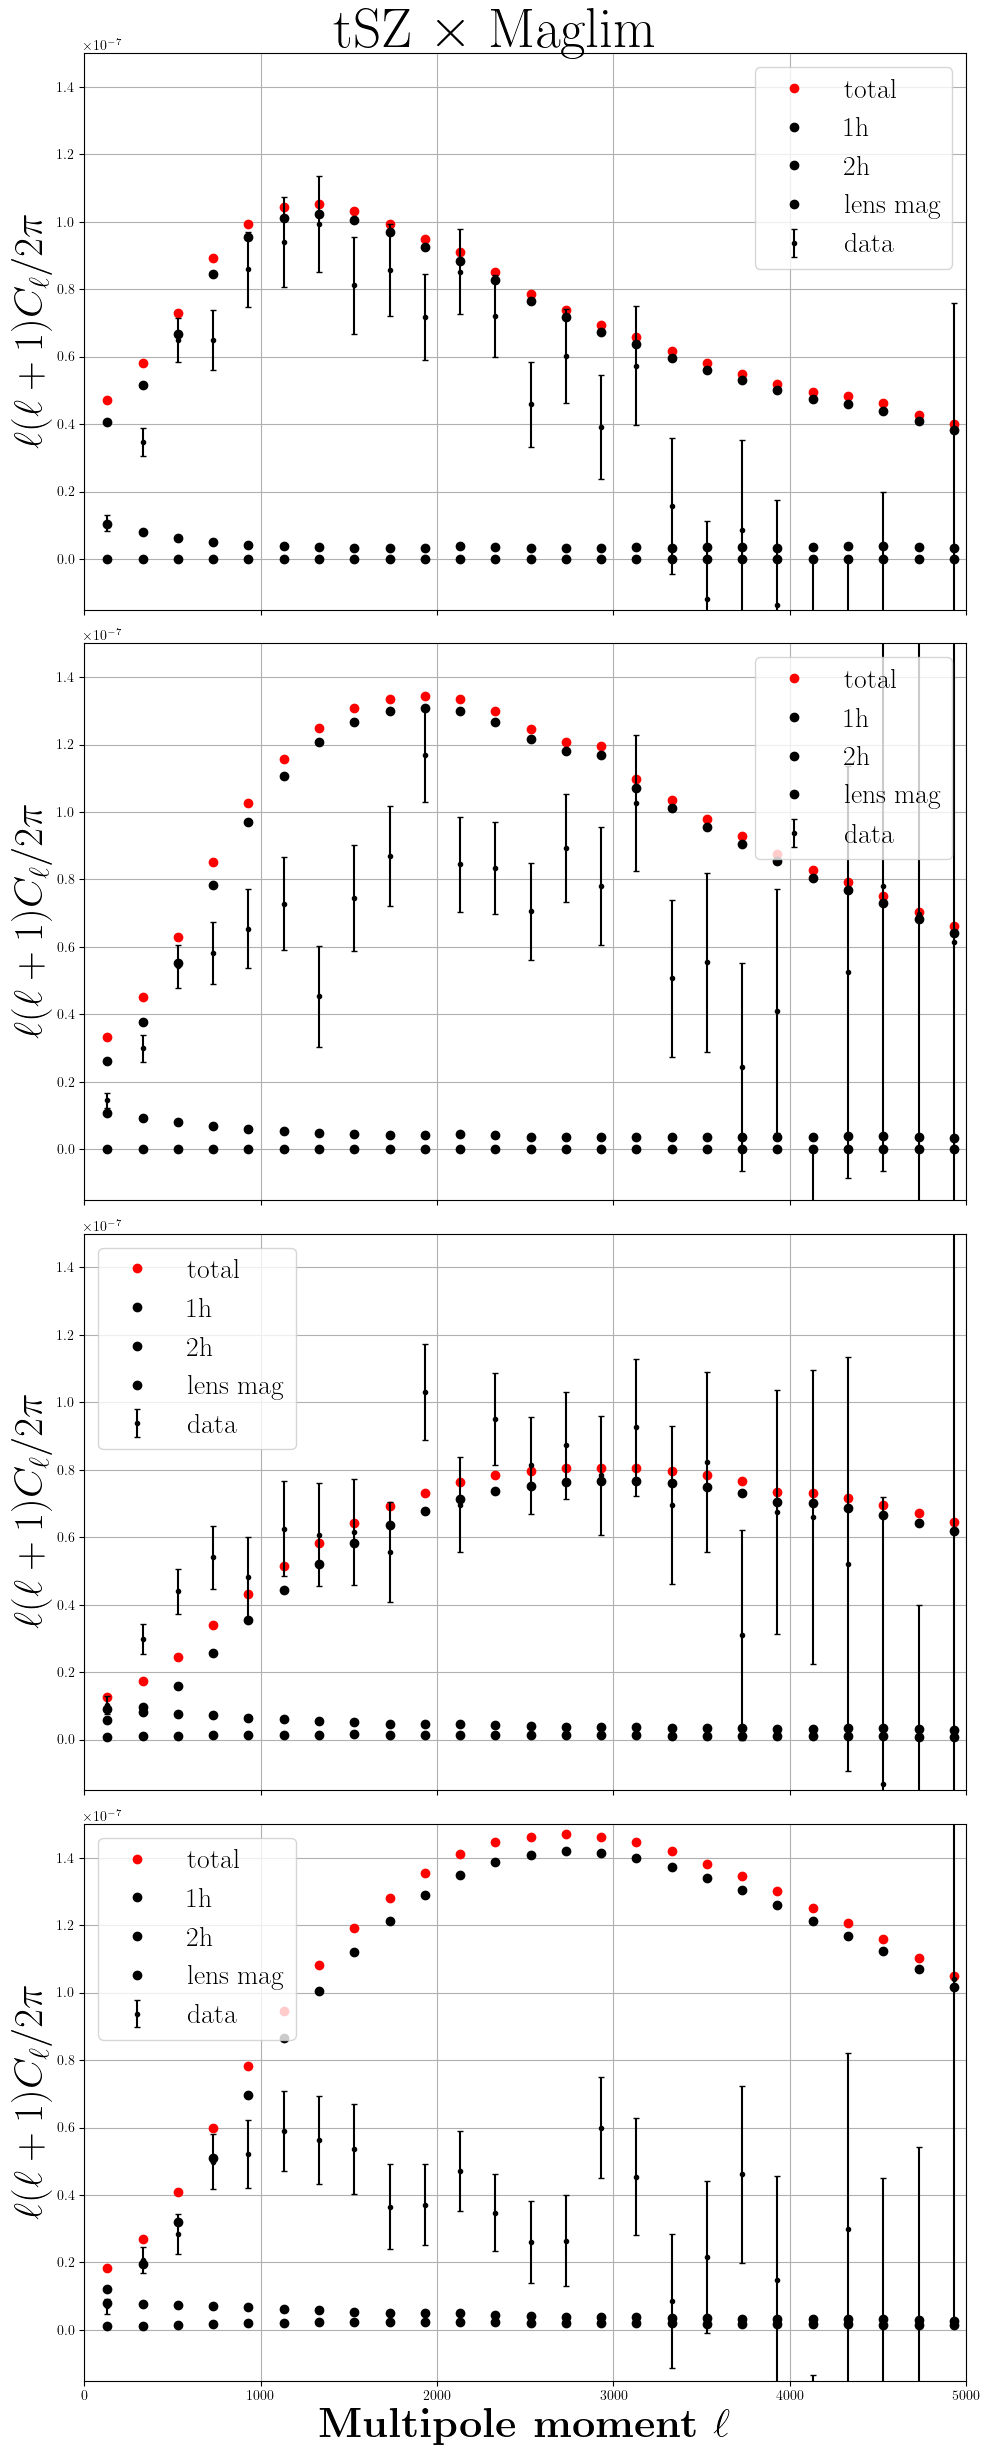

In [53]:
plot_dim = 4

fig, axes = plt.subplots(figsize=(10, 25), 
                         sharex=True, 
                         sharey=True, 
#                          ncols=4,
                          nrows=4,
                         )
plt.subplots_adjust(#left=0.1,
#                     bottom=0.1,
#                     right=0.9,
#                     top=0.9,
#                     wspace=0.4,
                    hspace=0.4)

ik = 0
for i in range(plot_dim):
    if i == 3:
        axes[i].set_xlabel(r'\textbf{Multipole moment $\ell$}', fontsize=30)
    axes[i].set_ylabel(r'$\ell(\ell+1)C_{\ell} /2\pi$ ', fontsize=30) 
    axes[i].grid()
    
  
    axes[i].plot(ell, Cls_yg_tot[i],'r',label=r'total',marker='o',ls='None')
    axes[i].plot(ell, Cl_yg_1h[i], color = "black", label=r'1h',ls='None',marker='o')
    axes[i].plot(ell, Cl_yg_2h[i], color = "black", label=r'2h',ls='None',marker='o')
    axes[i].plot(ell, Cl_ym[i], color = "black", label=r'lens mag',ls='None',marker='o')
    
    ell_yg_data, yg_data, sigma_yg_data = np.loadtxt(path_data + "yg_ACT_DR6_healpy_4096_"+act_map+"_DES_Maglim_"+str(i+1)+"_"+cls+".txt")
    axes[i].errorbar(ell_yg_data[:Npoints], yg_data[:Npoints], sigma_yg_data[:Npoints], fmt = ".", color = "black", capsize=2, label=r'data')

    axes[i].set_xlim(0,5000)
    axes[i].set_ylim(-1.5e-8, 1.5e-7)
    axes[i].legend(prop={'size': 20})
    fig.suptitle(r'tSZ $\times$ Maglim ',fontsize=40)
fig.tight_layout()

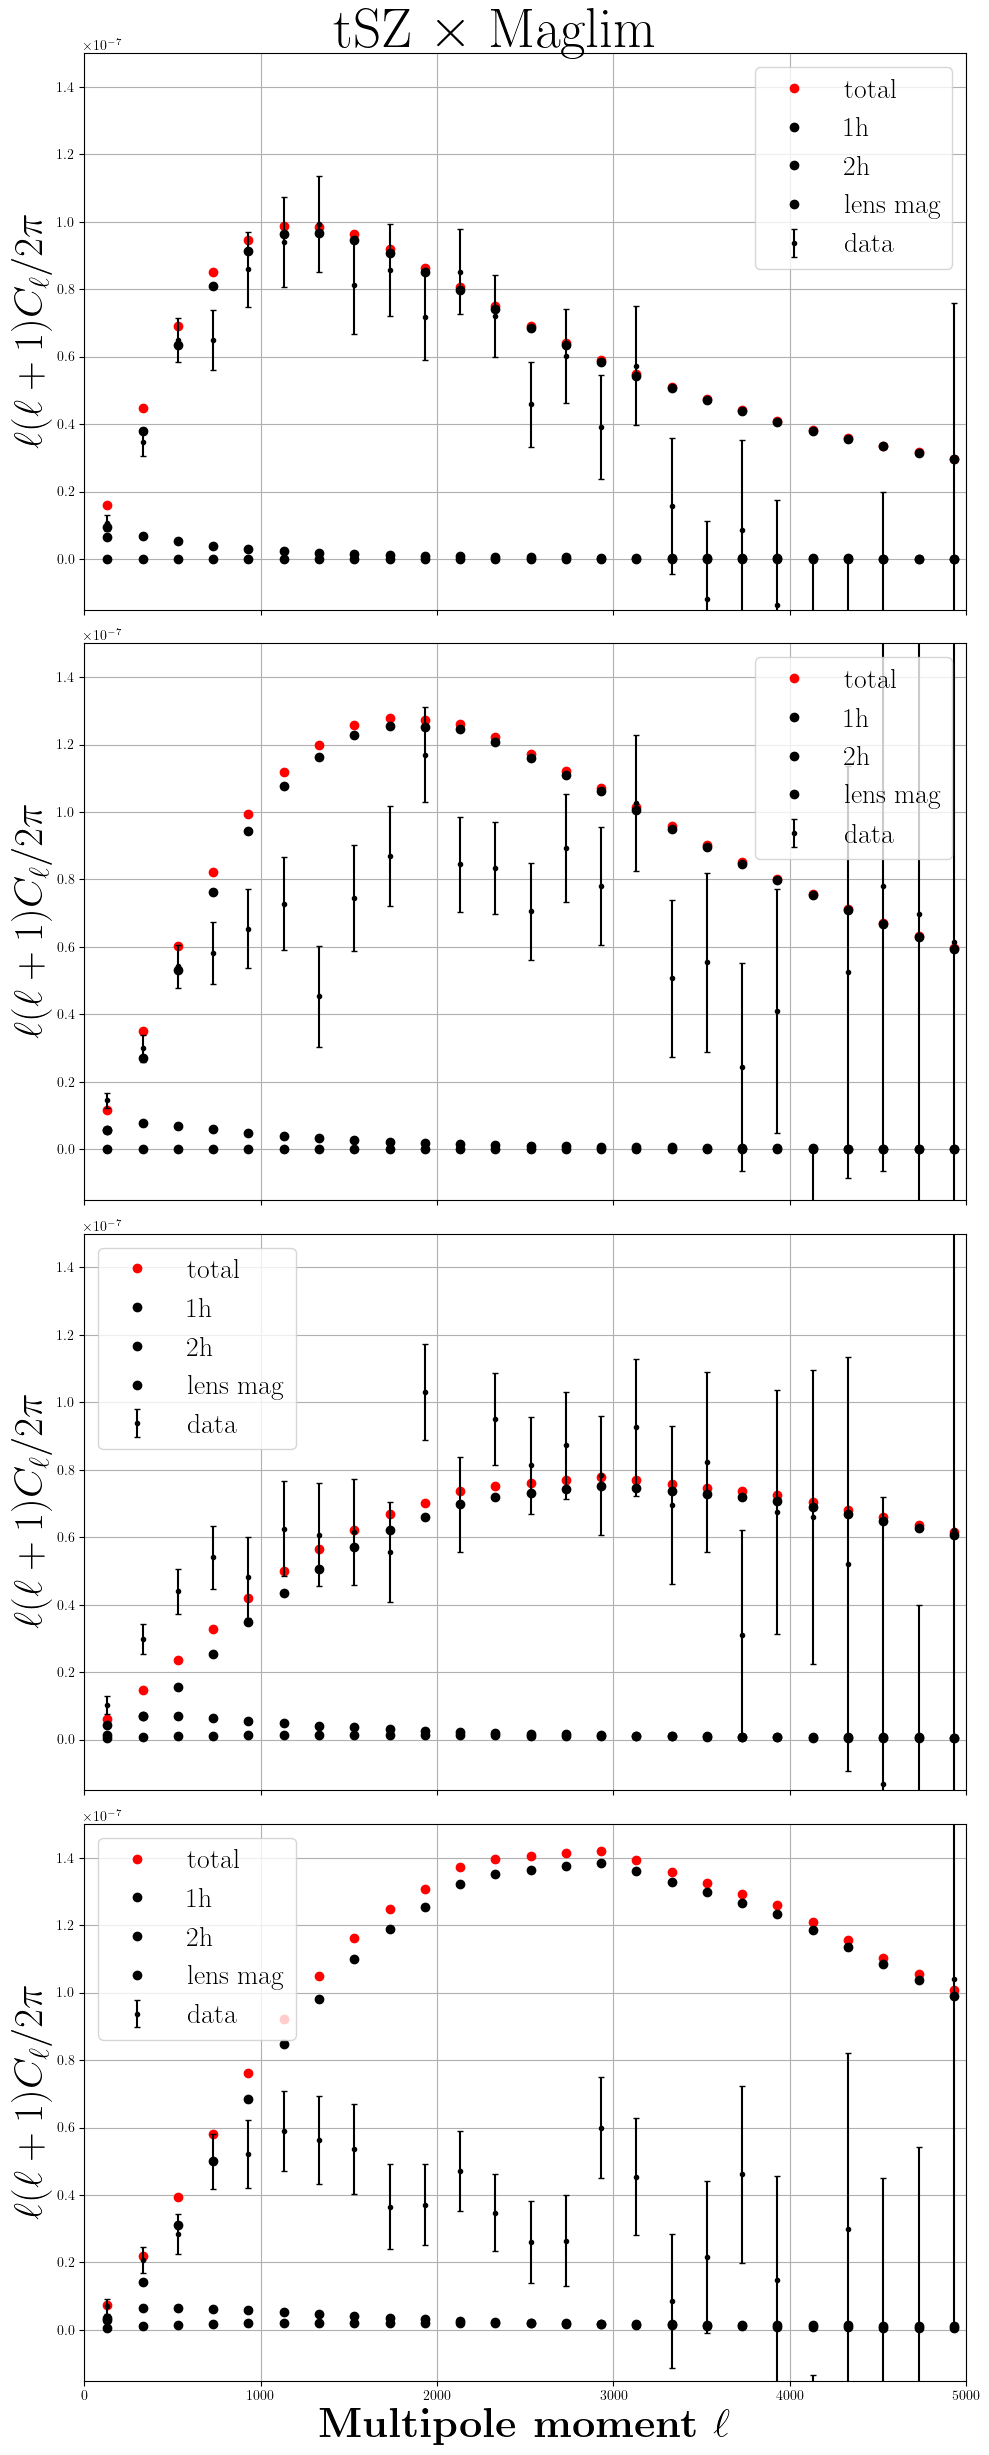

In [37]:
plot_dim = 4

fig, axes = plt.subplots(figsize=(10, 25), 
                         sharex=True, 
                         sharey=True, 
#                          ncols=4,
                          nrows=4,
                         )
plt.subplots_adjust(#left=0.1,
#                     bottom=0.1,
#                     right=0.9,
#                     top=0.9,
#                     wspace=0.4,
                    hspace=0.4)

ik = 0
for i in range(plot_dim):
    if i == 3:
        axes[i].set_xlabel(r'\textbf{Multipole moment $\ell$}', fontsize=30)
    axes[i].set_ylabel(r'$\ell(\ell+1)C_{\ell} /2\pi$ ', fontsize=30) 
    axes[i].grid()
    
  
    axes[i].plot(ell, Cls_yg_tot[i],'r',label=r'total',marker='o',ls='None')
    axes[i].plot(ell, Cl_yg_1h[i], color = "black", label=r'1h',ls='None',marker='o')
    axes[i].plot(ell, Cl_yg_2h[i], color = "black", label=r'2h',ls='None',marker='o')
    axes[i].plot(ell, Cl_ym[i], color = "black", label=r'lens mag',ls='None',marker='o')
    
    ell_yg_data, yg_data, sigma_yg_data = np.loadtxt(path_data + "yg_ACT_DR6_healpy_4096_"+act_map+"_DES_Maglim_"+str(i+1)+"_"+cls+".txt")
    axes[i].errorbar(ell_yg_data[:Npoints], yg_data[:Npoints], sigma_yg_data[:Npoints], fmt = ".", color = "black", capsize=2, label=r'data')

    axes[i].set_xlim(0,5000)
    axes[i].set_ylim(-1.5e-8, 1.5e-7)
    axes[i].legend(prop={'size': 20})
    fig.suptitle(r'tSZ $\times$ Maglim ',fontsize=40)
fig.tight_layout()

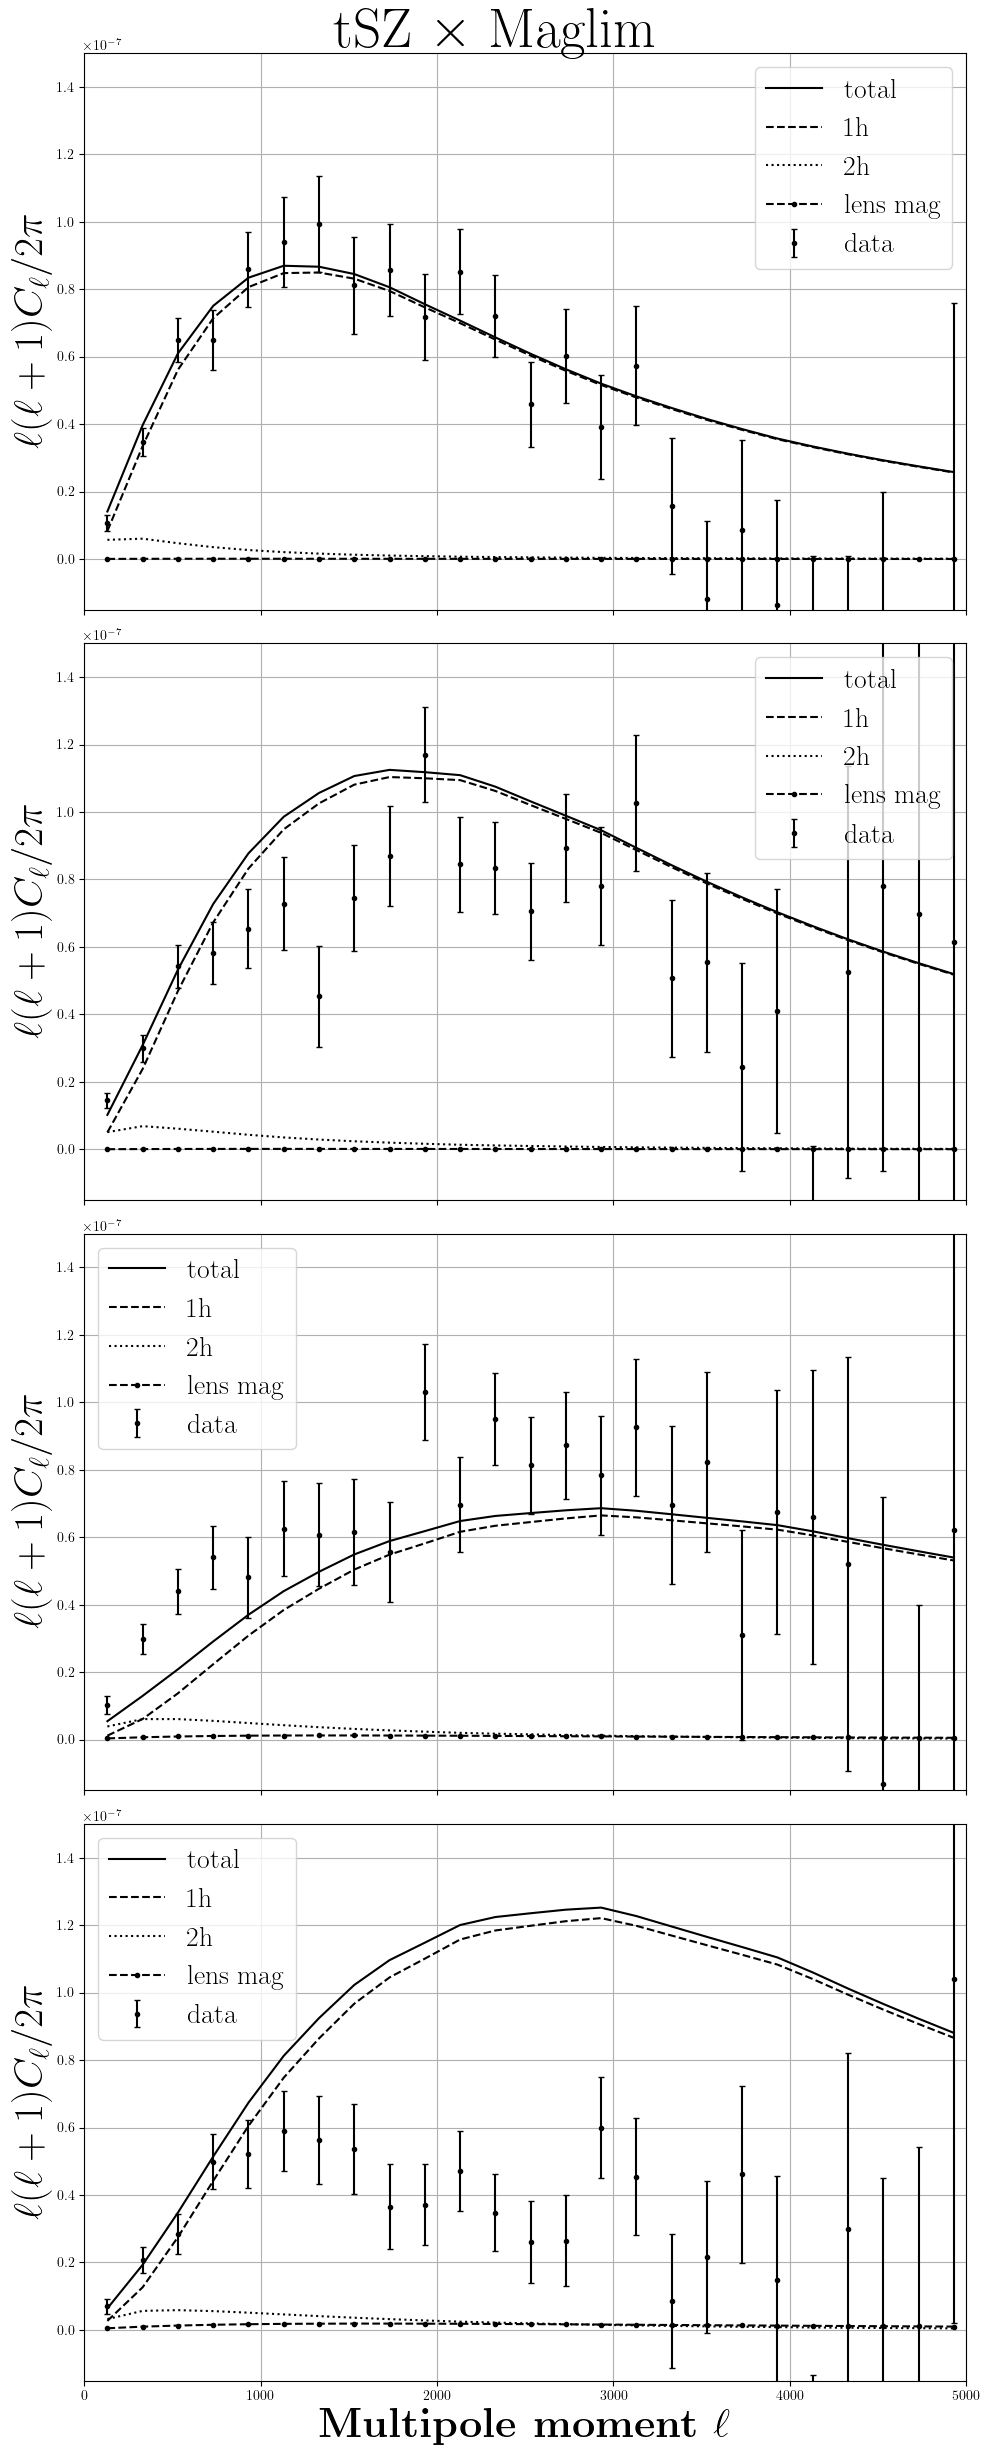

In [10]:
plot_dim = 4

fig, axes = plt.subplots(figsize=(10, 25), 
                         sharex=True, 
                         sharey=True, 
#                          ncols=4,
                          nrows=4,
                         )
plt.subplots_adjust(#left=0.1,
#                     bottom=0.1,
#                     right=0.9,
#                     top=0.9,
#                     wspace=0.4,
                    hspace=0.4)

ik = 0
for i in range(plot_dim):
    if i == 3:
        axes[i].set_xlabel(r'\textbf{Multipole moment $\ell$}', fontsize=30)
    axes[i].set_ylabel(r'$\ell(\ell+1)C_{\ell} /2\pi$ ', fontsize=30) 
    axes[i].grid()
    
  
    axes[i].plot(ell, Cls_yg_tot[i],'k-',label=r'total')
    axes[i].plot(ell, Cl_yg_1h[i],"--", color = "black", label=r'1h')
    axes[i].plot(ell, Cl_yg_2h[i],":", color = "black", label=r'2h')
    axes[i].plot(ell, Cl_ym[i],"--.", color = "black", label=r'lens mag')
    
    ell_yg_data, yg_data, sigma_yg_data = np.loadtxt(path_data + "yg_ACT_DR6_healpy_4096_"+act_map+"_DES_Maglim_"+str(i+1)+"_"+cls+".txt")
    axes[i].errorbar(ell_yg_data[:Npoints], yg_data[:Npoints], sigma_yg_data[:Npoints], fmt = ".", color = "black", capsize=2, label=r'data')

    axes[i].set_xlim(0,5000)
    axes[i].set_ylim(-1.5e-8, 1.5e-7)
    axes[i].legend(prop={'size': 20})
    fig.suptitle(r'tSZ $\times$ Maglim ',fontsize=40)
fig.tight_layout()

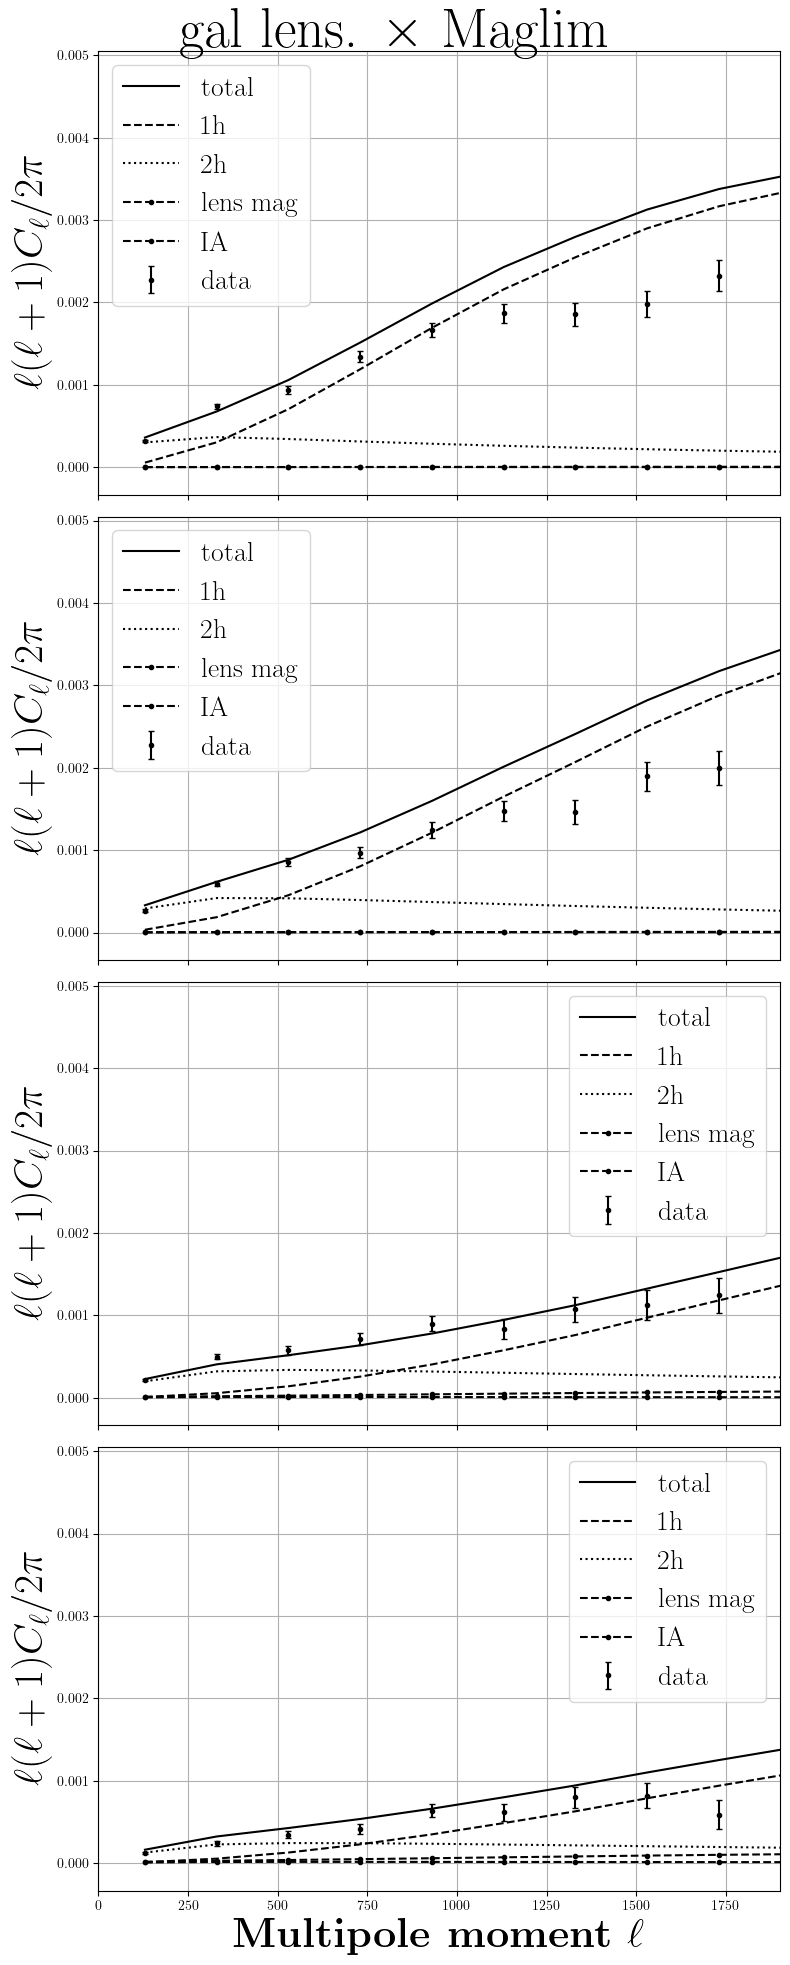

In [13]:
plot_dim = 4

fig, axes = plt.subplots(figsize=(8, 20), 
                         sharex=True, 
                         sharey=True, 
#                          ncols=4,
                          nrows=4,
                         )
plt.subplots_adjust(#left=0.1,
#                     bottom=0.1,
#                     right=0.9,
#                     top=0.9,
#                     wspace=0.4,
                    hspace=0.4)

ik = 0
for i in range(plot_dim):
    if i == 3:
        axes[i].set_xlabel(r'\textbf{Multipole moment $\ell$}', fontsize=30)
    axes[i].set_ylabel(r'$\ell(\ell+1)C_{\ell} /2\pi$ ', fontsize=30) 
    axes[i].grid()
    
  
    #
    axes[i].plot(ell, Cls_kg_tot[i],'k-',label=r'total')
    axes[i].plot(ell, Cl_kg_1h[i],"--", color = "black", label=r'1h')
    axes[i].plot(ell, Cl_kg_2h[i],":", color = "black", label=r'2h')
    axes[i].plot(ell, Cl_km[i],"--.", color = "black", label=r'lens mag')
    axes[i].plot(ell, Cl_IA[i],"--.", color = "black", label=r'IA')
    
    ell_kg_data, kg_data, sigma_kg_data = np.loadtxt(path_data + "gglens_DES_healpy_1024_Maglim"+str(i+1)+"_kappa4_"+cls+".txt")
    axes[i].errorbar(ell_kg_data[:Npoints], kg_data[:Npoints], sigma_kg_data[:Npoints], fmt = ".", color = "black", capsize=2, label=r'data')
#     axes[i].set_yscale("log")
    axes[i].set_xlim(0,1900)
#     axes[i].set_ylim(-1.5e-8, 1.5e-7)
    axes[i].legend(prop={'size': 20})
    fig.suptitle(r'gal lens. $\times$ Maglim ',fontsize=40)
fig.tight_layout()

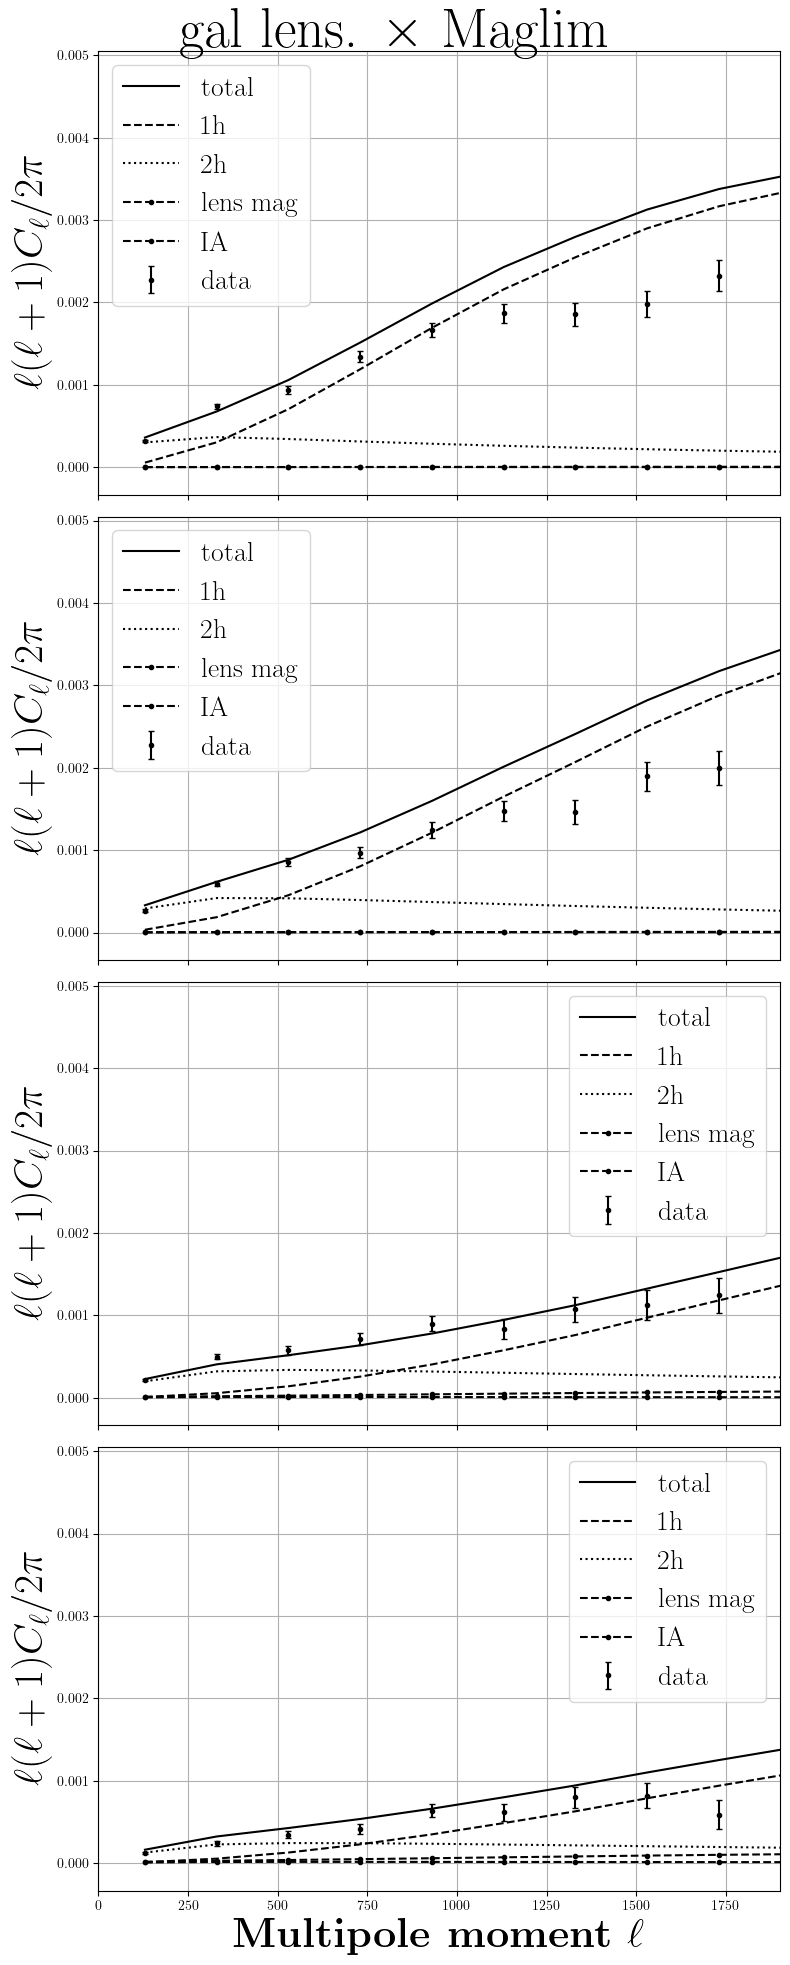

In [12]:
plot_dim = 4

fig, axes = plt.subplots(figsize=(8, 20), 
                         sharex=True, 
                         sharey=True, 
#                          ncols=4,
                          nrows=4,
                         )
plt.subplots_adjust(#left=0.1,
#                     bottom=0.1,
#                     right=0.9,
#                     top=0.9,
#                     wspace=0.4,
                    hspace=0.4)

ik = 0
for i in range(plot_dim):
    if i == 3:
        axes[i].set_xlabel(r'\textbf{Multipole moment $\ell$}', fontsize=30)
    axes[i].set_ylabel(r'$\ell(\ell+1)C_{\ell} /2\pi$ ', fontsize=30) 
    axes[i].grid()
    
  
    #
    axes[i].plot(ell, Cls_kg_tot[i],'k-',label=r'total')
    axes[i].plot(ell, Cl_kg_1h[i],"--", color = "black", label=r'1h')
    axes[i].plot(ell, Cl_kg_2h[i],":", color = "black", label=r'2h')
    axes[i].plot(ell, Cl_km[i],"--.", color = "black", label=r'lens mag')
    axes[i].plot(ell, Cl_IA[i],"--.", color = "black", label=r'IA')
    
    ell_kg_data, kg_data, sigma_kg_data = np.loadtxt(path_data + "gglens_DES_healpy_1024_Maglim"+str(i+1)+"_kappa4_"+cls+".txt")
    axes[i].errorbar(ell_kg_data[:Npoints], kg_data[:Npoints], sigma_kg_data[:Npoints], fmt = ".", color = "black", capsize=2, label=r'data')
#     axes[i].set_yscale("log")
    axes[i].set_xlim(0,1900)
#     axes[i].set_ylim(-1.5e-8, 1.5e-7)
    axes[i].legend(prop={'size': 20})
    fig.suptitle(r'gal lens. $\times$ Maglim ',fontsize=40)
fig.tight_layout()